In [1]:
!pip install gymnasium pygame shimmy --quiet


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Sukuriame aplinką
env = gym.make("FrozenLake-v1", is_slippery=True)

# Q-lentelė
state_size = env.observation_space.n
action_size = env.action_space.n
q_table = np.zeros((state_size, action_size))

# Parametrai
alpha = 0.8
gamma = 0.95
epsilon = 0.1
episodes = 2000

rewards = []

for ep in range(episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        # epsilon-greedy strategija
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Q-lentelės atnaujinimas
        q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

        state = next_state
        total_reward += reward

    rewards.append(total_reward)

print("✅ Treniravimas baigtas!")


✅ Treniravimas baigtas!


🎯 Vidutinė sėkmė: 0.00


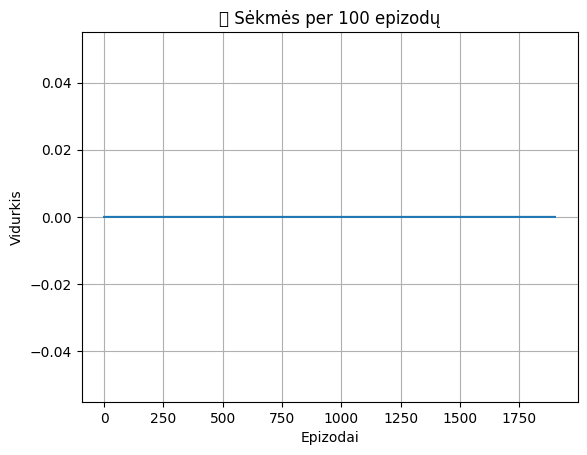

In [4]:
avg_success = np.mean(rewards)
print(f"🎯 Vidutinė sėkmė: {avg_success:.2f}")

# Judantis vidurkis
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.title("📈 Sėkmės per 100 epizodų")
plt.xlabel("Epizodai")
plt.ylabel("Vidurkis")
plt.grid(True)
plt.show()


In [5]:
# Sukuriam aplinką su tekstiniu (ANSI) atvaizdavimu
env = gym.make("FrozenLake-v1", render_mode="ansi", is_slippery=True)

state, _ = env.reset()
done = False

print("Apmokytas agentas veikia:")

while not done:
    action = np.argmax(q_table[state])
    state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated

    print(env.render())  # tekstinė vizualizacija


Apmokytas agentas veikia:
  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG



S – Starto pozicija

F – Free (saugus ledo langelis)

H – Hole (duobė – jei įkrenti, pralaimi)

G – Goal (tikslas)
Raudonai pažymėtas langelis (raudonas) – agento esama pozicija

(Left) – paskutinis agento atliktas veiksmas

SU GRAFINE VIZUALIZACIJA

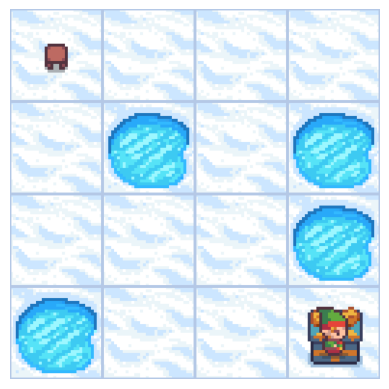

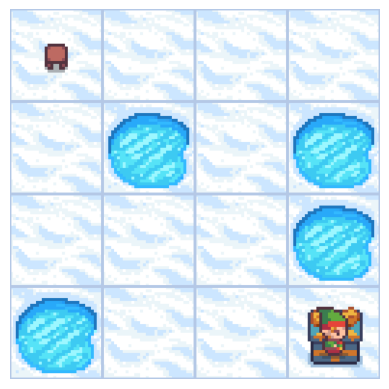

In [6]:
import gymnasium as gym #žaidimų simuliavimo biblioteka
import numpy as np #skaičiavimams su masyvais (Q lentelės valdymui)
import matplotlib.pyplot as plt # grafikai, čia naudojamas paveikslėliui rodyti
from IPython.display import display, clear_output #leidžia atnaujinti paveikslėlį kiekviename žingsnyje
import time #jeigu norime pauzių tarp žingsnių

# Sukuriame aplinką
env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)

# Inicijuojame apmokytą (arba tuščią) Q lentelę
q_table = np.zeros((env.observation_space.n, env.action_space.n))

# Paprasta rankinė Q lentelė (kelias į žaidimo pabaigą)
# [dešinė=2, žemyn=1] – pakeiskite kaip norite :)
simple_policy = [2, 2, 1, 1,
                 1, 2, 1, 0,
                 2, 2, 1, 0,
                 2, 2, 2, 0]

# Pradedam
state, _ = env.reset()
done = False

while not done:
    action = simple_policy[state]
    state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated

    # kaip atrodo aplinka+agentas?
    frame = env.render()
    plt.imshow(frame)
    plt.axis("off")
    clear_output(wait=True)
    display(plt.gcf())
    time.sleep(0.6)  # Pauzės dydis

env.close()


VALIO

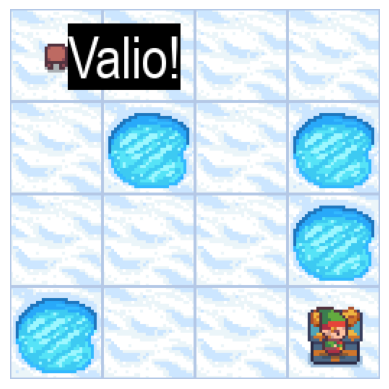

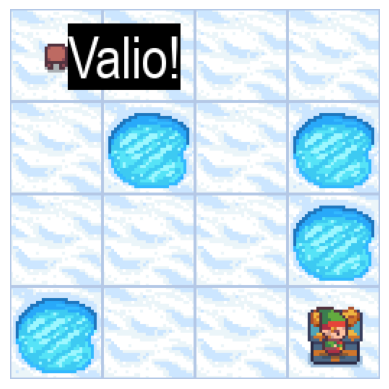

In [7]:
import pygame
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

pygame.init()

env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)

def display_text_on_frame(frame, text, position=(40, 10), font_size=40):
    h, w, _ = frame.shape
    surface = pygame.image.frombuffer(frame.tobytes(), (w, h), 'RGB')
    font = pygame.font.SysFont("Arial", font_size)
    text_surface = font.render(text, True, (255, 255, 255))
    bg_rect = text_surface.get_rect(topleft=position)
    pygame.draw.rect(surface, (0, 0, 0), bg_rect)
    surface.blit(text_surface, position)

    return pygame.surfarray.array3d(surface).transpose(1, 0, 2)

# PAM PA RAAAAAAM
simple_policy = [2, 2, 1, 1,
                 1, 2, 1, 0,
                 2, 2, 1, 0,
                 2, 2, 2, 0]

goal_state = 15
state, _ = env.reset()
done = False

while not done:
    action = simple_policy[state]
    state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated

    frame = env.render()

    if state == goal_state:
        frame = display_text_on_frame(frame, "Valio!", position=(40, 10), font_size=40)

    plt.imshow(frame)
    plt.axis("off")
    clear_output(wait=True)
    display(plt.gcf())
    time.sleep(0.6)

env.close()


SIMBOLIAI

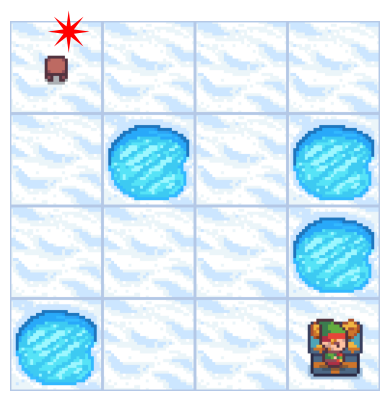

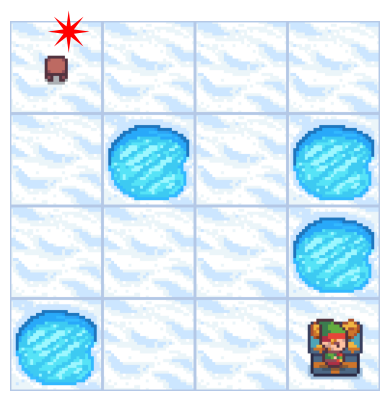

In [8]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Sukuriame aplinką
env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)

# Paprasta rankinė Q lentelė (kelias į žaidimo pabaigą)
simple_policy = [2, 2, 1, 1,
                 1, 2, 1, 0,
                 2, 2, 1, 0,
                 2, 2, 2, 0]

# Funkcija, kuri rodo širdelės simbolį, kai pasiektas tikslas
def display_heart(frame, position, font_size=40):
    # Paveikslėlio rodymas su širdelės simboliu
    plt.text(position[0], position[1], '✴', fontsize=font_size, color='red', ha='center', va='center')

    return frame

# Pradedam
state, _ = env.reset()
done = False

while not done:
    action = simple_policy[state]
    state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated

    # Rodyti aplinką
    frame = env.render()

    # Pasiekus tikslą, rodyti širdelę/betkokius elementus
    if state == 15:  # Tai tikslas (pasiektas tikslas)
        frame = display_heart(frame, (40, 10), 40)  # beeeet tik pasiekus tikslą

    # Rodyti aplinką su simboliu
    plt.imshow(frame)
    plt.axis("off")
    clear_output(wait=True)
    display(plt.gcf())

    # Pauzė tarp žingsnių, kad būtų matoma
    time.sleep(0.6)

env.close()


PAKEISKIME AGENTĄ FORMOMIS :)

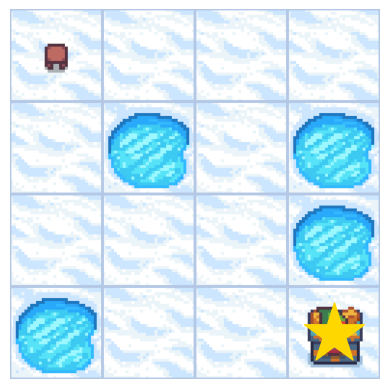

In [9]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# 1. Sukuriam aplinką ir politiką
env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)
policy = [2,2,1,1, 1,2,1,0, 2,2,1,0, 2,2,2,0]

# 2. Ištraukiam „raw“ aplinką, kad gautume nrow/ncol
unwrapped = env.unwrapped
nrow, ncol = unwrapped.nrow, unwrapped.ncol

state, _ = env.reset()
done = False

while not done:
    # 3. žingsnis, atnaujinam būseną
    action = policy[state]
    state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated

    # 4. nupiešiam backgroundą
    frame = env.render()
    fig, ax = plt.subplots()
    ax.imshow(frame)
    ax.axis("off")

    # 5. Apskaičiuojam agento koordinatę
    h, w, _ = frame.shape
    cell_h, cell_w = h/nrow, w/ncol
    col, row = state % ncol, state // ncol
    x, y = col*cell_w + cell_w/2, row*cell_h + cell_h/2

    # 6. Piešiam agentą – apskritimą, o jeigu paskutinė būsenė, piešiam žvaigždutę
    if state == (nrow*ncol - 1):
        # žvaigždutė
        ax.scatter(x, y, s=cell_w*cell_h/2, marker='*', c='gold')
    else:
        # paprastas apskritimas
        circle = plt.Circle((x, y), radius=min(cell_h,cell_w)/3, color='red')
        ax.add_patch(circle)

    # 7. atnaujinam ekraną
    clear_output(wait=True)
    display(fig)
    plt.close(fig)

    time.sleep(0.5)

env.close()


+ Belmano lygtis


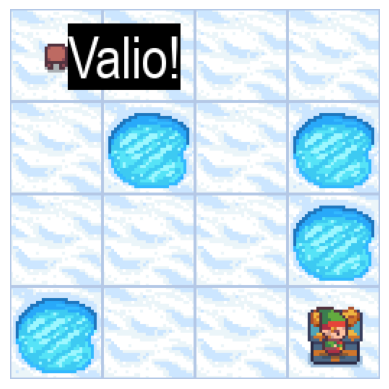

Optimali vertė kiekvienai būsenai (vertės iteracija):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


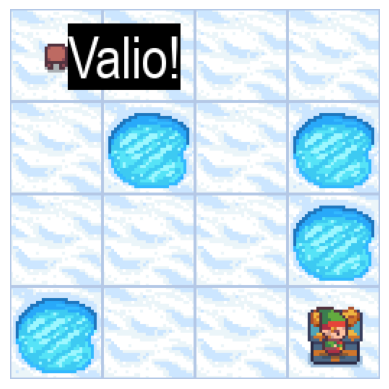

In [10]:
import pygame
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

pygame.init()

env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)

# Funkcija, kuri įterpia tekstą į ekrano kadro (frame) paveikslėlį
def display_text_on_frame(frame, text, position=(40, 10), font_size=40):
    h, w, _ = frame.shape
    surface = pygame.image.frombuffer(frame.tobytes(), (w, h), 'RGB')
    font = pygame.font.SysFont("Arial", font_size)
    text_surface = font.render(text, True, (255, 255, 255))
    bg_rect = text_surface.get_rect(topleft=position)
    pygame.draw.rect(surface, (0, 0, 0), bg_rect)
    surface.blit(text_surface, position)

    return pygame.surfarray.array3d(surface).transpose(1, 0, 2)

# Belmano lygties vertės iteracijos metodas
def value_iteration(env, gamma=0.9, theta=1e-4):
    num_actions = env.action_space.n  # Veiksmų skaičius
    num_states = env.observation_space.n  # Būsenų skaičius

    # Inicializuojame vertes
    V = np.zeros(num_states)

    def update_value_function(V):
        delta = 0
        # Peržiūrime kiekvieną būseną
        for s in range(num_states):
            v = V[s]
            new_value = float('-inf')

            # Apskaičiuojame vertę kiekvienam veiksmui
            for a in range(num_actions):
                action_value = 0
                # Norint gauti perėjimus, atlikite veiksmo simuliaciją
                for _ in range(100):  # Simuliacija su 100 atsitiktinių perėjimų
                    state, _ = env.reset()  # Svarbu atlikti reset kiekvienam veiksmui
                    next_state, reward, terminated, truncated, _ = env.step(a)
                    action_value += reward + gamma * V[next_state]

                new_value = max(new_value, action_value / 100)  # Vidutinė vertė

            V[s] = new_value
            delta = max(delta, abs(v - V[s]))

        return delta

    iteration = 0
    while True:
        delta = update_value_function(V)
        iteration += 1
        if delta < theta:
            break

    return V

# Apskaičiuojame optimalią vertę kiekvienai būsenai
V = value_iteration(env)

# Naudojame paprastą politiką
simple_policy = [2, 2, 1, 1,
                 1, 2, 1, 0,
                 2, 2, 1, 0,
                 2, 2, 2, 0]

goal_state = 15
state, _ = env.reset()  # Užtikriname, kad pradžioje bus atliktas reset
done = False

while not done:
    # Veiksmas pasirenkamas pagal paprastą politiką
    action = simple_policy[state]

    # Atnaujiname būseną pagal pasirinktas veiksmas
    state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated

    frame = env.render()

    # Patikriname, ar pasiekta tikslo būsena
    if state == goal_state:
        frame = display_text_on_frame(frame, "Valio!", position=(40, 10), font_size=40)

    # Pavaizduojame rėmelį su vertėmis
    plt.imshow(frame)
    plt.axis("off")
    clear_output(wait=True)
    display(plt.gcf())
    time.sleep(0.6)

env.close()

# Atspausdiname optimalią vertę kiekvienai būsenai
print("Optimali vertė kiekvienai būsenai (vertės iteracija):")
print(V)
